In [ ]:
# @author: ALI GHANBARI
# @email: alighanbari446@gmail.com

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('RFM.xlsx')

In [4]:
df.head()

,شماره مشتری,تاریخ,stock_code,نام کالا,quantity,unit_price
0,224356,12/11/2018,5585,دلستر خانواده,4.0,30000
1,224356,12/11/2018,5586,دلستر قوطی,4.0,30000
2,224356,12/16/2018,5370,شیر 250 cc,4.0,14000
3,224356,12/23/2018,3531,شیر قهوه موکا,2.0,14000
4,224356,12/23/2018,8596,آب پرتقال 250 cc,3.0,14000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412253 entries, 0 to 412252
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   شماره مشتری  412253 non-null  int64  
 1   تاریخ        412253 non-null  object 
 2   stock_code   412253 non-null  int64  
 3   نام کالا     412253 non-null  object 
 4   quantity     412253 non-null  float64
 5   unit_price   412253 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 18.9+ MB


In [7]:
df.rename(columns={
    'شماره مشتری': 'CID',
    'تاریخ': 'date',
    'نام کالا': 'stock_name'
}, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412253 entries, 0 to 412252
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CID         412253 non-null  int64  
 1   date        412253 non-null  object 
 2   stock_code  412253 non-null  int64  
 3   stock_name  412253 non-null  object 
 4   quantity    412253 non-null  float64
 5   unit_price  412253 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 18.9+ MB


In [9]:
df.date.min(), df.date.max()

('1/1/2019', '9/8/2019')

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df.date.min(), df.date.max()

(Timestamp('2018-12-01 00:00:00'), Timestamp('2019-12-30 00:00:00'))

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412253 entries, 0 to 412252
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   CID         412253 non-null  int64         
 1   date        412253 non-null  datetime64[ns]
 2   stock_code  412253 non-null  int64         
 3   stock_name  412253 non-null  object        
 4   quantity    412253 non-null  float64       
 5   unit_price  412253 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 18.9+ MB


In [14]:
df.stock_code.unique()

array([5585, 5586, 5370, 3531, 8596, 8775, 7178, 5125, 5587, 5584],
      dtype=int64)

In [15]:
df.stock_code.nunique()

10

In [16]:
df.stock_code.value_counts()

stock_code
8775    122305
8596    114370
3531     80202
5370     69820
7178     14989
5125      4112
5585      3691
5586      2761
5587         2
5584         1
Name: count, dtype: int64

In [17]:
df.stock_name.value_counts()

stock_name
آب آلبالو  250 cc                      122305
آب پرتقال 250 cc                       114370
شیر قهوه موکا                           80202
شیر 250 cc                              69820
آب انبه 200 cc                          14989
دمنوش نعناع ۲۵۰ سی سی لیوانی             4112
دلستر خانواده                            3691
دلستر قوطی                               2761
آب انار بسته بندی پت جدید ۲۵۰ سی سی         2
آب آلبالو ۲۵۰ پاکتی جدید                    1
Name: count, dtype: int64

In [18]:
df.drop(['stock_name'])

KeyError: "['stock_name'] not found in axis"

In [20]:
df=df.drop(['stock_name'], axis=1)

In [22]:
df.quantity.nunique()

128

In [23]:
df.describe()

,CID,date,stock_code,quantity,unit_price
count,4.122530e+05,412253,412253.000000,412253.000000,412253.000000
mean,2.651539e+07,2019-07-11 13:10:56.465810688,6984.052361,3.444537,14250.409336
min,2.243560e+05,2018-12-01 00:00:00,3531.000000,-97.000000,14000.000000
25%,4.706288e+06,2019-04-16 00:00:00,5370.000000,2.000000,14000.000000
50%,4.433706e+07,2019-07-27 00:00:00,8596.000000,4.000000,14000.000000
75%,4.455676e+07,2019-10-15 00:00:00,8775.000000,5.000000,14000.000000
max,4.943186e+07,2019-12-30 00:00:00,8775.000000,300.000000,30000.000000
std,1.984150e+07,NaN,2121.276685,3.274752,1985.913922


In [24]:
df[df.quantity < 0]

,CID,date,stock_code,quantity,unit_price
14,224356,2019-03-02,3531,-6.0,14000
15,224356,2019-03-16,5370,-2.0,14000
16,224356,2019-03-16,8775,-2.0,14000
26,224356,2019-09-25,3531,-1.0,14000
27,224356,2019-10-14,3531,-1.0,14000
...,...,...,...,...,...
412242,49332232,2019-12-11,3531,-3.0,14000
412243,49332232,2019-12-11,8596,-2.0,14000
412246,49332232,2019-12-14,3531,-1.0,14000
412247,49332232,2019-12-14,8596,-1.0,14000


In [26]:
df[df.CID == 224356].sort_values('date')

,CID,date,stock_code,quantity,unit_price
0,224356,2018-12-11,5585,4.0,30000
1,224356,2018-12-11,5586,4.0,30000
2,224356,2018-12-16,5370,4.0,14000
3,224356,2018-12-23,3531,2.0,14000
4,224356,2018-12-23,8596,3.0,14000
5,224356,2018-12-23,8775,3.0,14000
7,224356,2018-12-30,8596,3.0,14000
8,224356,2018-12-30,8775,3.0,14000
6,224356,2018-12-30,5370,6.0,14000
9,224356,2019-01-13,5585,2.0,30000


In [27]:
df[df.quantity<=0].shape

(57498, 5)

In [28]:
df = df[df.quantity>0]

In [29]:
df.shape

(354755, 5)

In [30]:
df

,CID,date,stock_code,quantity,unit_price
0,224356,2018-12-11,5585,4.0,30000
1,224356,2018-12-11,5586,4.0,30000
2,224356,2018-12-16,5370,4.0,14000
3,224356,2018-12-23,3531,2.0,14000
4,224356,2018-12-23,8596,3.0,14000
...,...,...,...,...,...
412244,49332232,2019-12-12,3531,3.0,14000
412245,49332232,2019-12-12,5370,3.0,14000
412249,49332232,2019-12-17,8596,6.0,14000
412250,49332232,2019-12-17,8775,6.0,14000


In [31]:
df.groupby('CID').sum()

TypeError: datetime64 type does not support sum operations

In [32]:
df.groupby('CID')['quantity'].sum()

CID
224356        68.4
276154        68.6
279696       276.6
1301753     3319.2
1393653      701.2
             ...  
45151176       9.8
45151177       4.4
45333469    1656.4
49332232      89.4
49431856       5.0
Name: quantity, Length: 8961, dtype: float64

In [33]:
df['total'] = df.quantity * df.unit_price

In [34]:
df

,CID,date,stock_code,quantity,unit_price,total
0,224356,2018-12-11,5585,4.0,30000,120000.0
1,224356,2018-12-11,5586,4.0,30000,120000.0
2,224356,2018-12-16,5370,4.0,14000,56000.0
3,224356,2018-12-23,3531,2.0,14000,28000.0
4,224356,2018-12-23,8596,3.0,14000,42000.0
...,...,...,...,...,...,...
412244,49332232,2019-12-12,3531,3.0,14000,42000.0
412245,49332232,2019-12-12,5370,3.0,14000,42000.0
412249,49332232,2019-12-17,8596,6.0,14000,84000.0
412250,49332232,2019-12-17,8775,6.0,14000,84000.0


### M

In [35]:
df.groupby('CID')['total'].sum()

CID
224356       1309600.0
276154        960400.0
279696       3872400.0
1301753     47076800.0
1393653      9864800.0
               ...    
45151176      137200.0
45151177       61600.0
45333469    23477600.0
49332232     1251600.0
49431856       70000.0
Name: total, Length: 8961, dtype: float64

### F

In [36]:
df.groupby('CID')['date'].nunique()

CID
224356       13
276154        8
279696       27
1301753     128
1393653      81
           ... 
45151176      3
45151177      3
45333469     97
49332232     10
49431856      1
Name: date, Length: 8961, dtype: int64

In [37]:
df.groupby('CID')['date'].max()

CID
224356     2019-11-24
276154     2019-12-30
279696     2019-12-17
1301753    2019-12-26
1393653    2019-12-24
              ...    
45151176   2019-12-04
45151177   2019-12-08
45333469   2019-12-29
49332232   2019-12-17
49431856   2019-02-27
Name: date, Length: 8961, dtype: datetime64[ns]

In [38]:
maxDate = df['date'].max()
maxDate

Timestamp('2019-12-30 00:00:00')

In [40]:
maxDate - df.date

0        384 days
1        384 days
2        379 days
3        372 days
4        372 days
           ...   
412244    18 days
412245    18 days
412249    13 days
412250    13 days
412252   306 days
Name: date, Length: 354755, dtype: timedelta64[ns]

In [41]:
maxDate - df.groupby('CID')['date'].max()

CID
224356      36 days
276154       0 days
279696      13 days
1301753      4 days
1393653      6 days
             ...   
45151176    26 days
45151177    22 days
45333469     1 days
49332232    13 days
49431856   306 days
Name: date, Length: 8961, dtype: timedelta64[ns]

### R

In [42]:
maxDate - df.groupby('CID')['date'].max() + 1

TypeError: Addition/subtraction of integers and integer-arrays with TimedeltaArray is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [46]:
def func(aDate):
    return (maxDate - aDate).days + 1
df.date.apply(func)

0         385
1         385
2         380
3         373
4         373
         ... 
412244     19
412245     19
412249     14
412250     14
412252    307
Name: date, Length: 354755, dtype: int64

In [47]:
def func(aDate):
    return (maxDate - aDate).days + 1
df['DateDiff'] = df.date.apply(func)

In [49]:
df['DateDiff'] = df.date.apply(lambda aDate: (maxDate - aDate).days + 1)

In [50]:
df

,CID,date,stock_code,quantity,unit_price,total,DateDiff
0,224356,2018-12-11,5585,4.0,30000,120000.0,385
1,224356,2018-12-11,5586,4.0,30000,120000.0,385
2,224356,2018-12-16,5370,4.0,14000,56000.0,380
3,224356,2018-12-23,3531,2.0,14000,28000.0,373
4,224356,2018-12-23,8596,3.0,14000,42000.0,373
...,...,...,...,...,...,...,...
412244,49332232,2019-12-12,3531,3.0,14000,42000.0,19
412245,49332232,2019-12-12,5370,3.0,14000,42000.0,19
412249,49332232,2019-12-17,8596,6.0,14000,84000.0,14
412250,49332232,2019-12-17,8775,6.0,14000,84000.0,14


In [51]:
df.groupby('CID')['DateDiff'].min()

CID
224356       37
276154        1
279696       14
1301753       5
1393653       7
           ... 
45151176     27
45151177     23
45333469      2
49332232     14
49431856    307
Name: DateDiff, Length: 8961, dtype: int64

In [52]:
df.groupby('CID').agg({'DateDiff': 'min'})

,DateDiff
CID,
224356,37
276154,1
279696,14
1301753,5
1393653,7
...,...
45151176,27
45151177,23
45333469,2


In [53]:
df.groupby('CID').agg({
    'DateDiff': 'min',
    'date': 'nunique',
    'total': 'sum'
})

,DateDiff,date,total
CID,,,
224356,37,13,1309600.0
276154,1,8,960400.0
279696,14,27,3872400.0
1301753,5,128,47076800.0
1393653,7,81,9864800.0
...,...,...,...
45151176,27,3,137200.0
45151177,23,3,61600.0
45333469,2,97,23477600.0


In [54]:
dfRFM = df.groupby('CID').agg({
    'DateDiff': 'min',
    'date': 'nunique',
    'total': 'sum'
})
dfRFM.columns = ['R', 'F', 'M']
dfRFM

,R,F,M
CID,,,
224356,37,13,1309600.0
276154,1,8,960400.0
279696,14,27,3872400.0
1301753,5,128,47076800.0
1393653,7,81,9864800.0
...,...,...,...
45151176,27,3,137200.0
45151177,23,3,61600.0
45333469,2,97,23477600.0


In [55]:
def plot_3D(data, labels, x, y, z):
    fig = plt.figure(figsize=(8, 6))
    ax = plt.axes(projection ='3d')
    ax.scatter(data[x], data[y], data[z], c = labels)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)

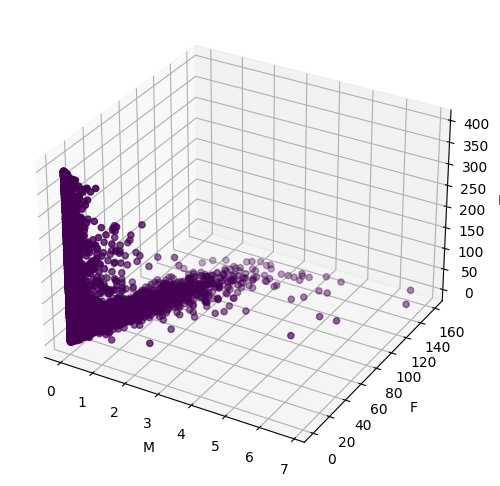

In [57]:
plot_3D(dfRFM, [0 for i in range(len(dfRFM))], 'M', 'F', 'R')

In [58]:
dfRFM.corr()

,R,F,M
R,1.000000,-0.326563,-0.251831
F,-0.326563,1.000000,0.883375
M,-0.251831,0.883375,1.000000


<Axes: >

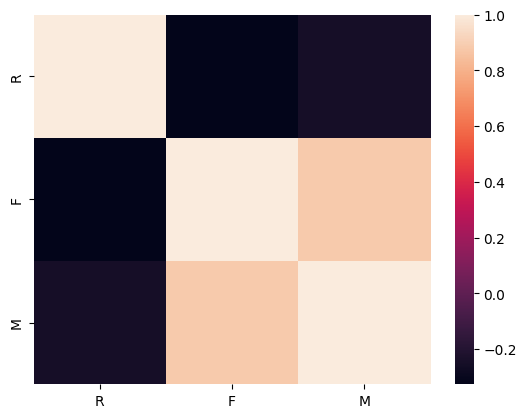

In [59]:
sns.heatmap(dfRFM.corr())

In [61]:
dfRFM.corr().abs()

,R,F,M
R,1.000000,0.326563,0.251831
F,0.326563,1.000000,0.883375
M,0.251831,0.883375,1.000000


<Axes: >

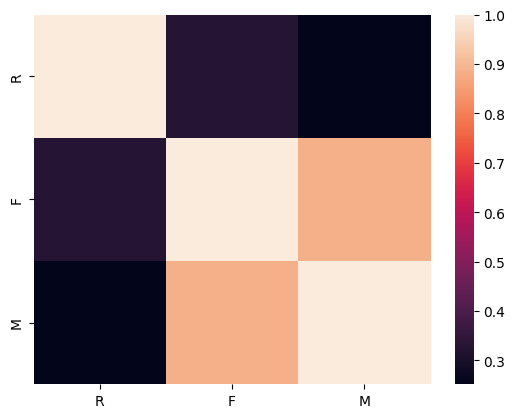

In [60]:
sns.heatmap(dfRFM.corr().abs())

<Axes: >

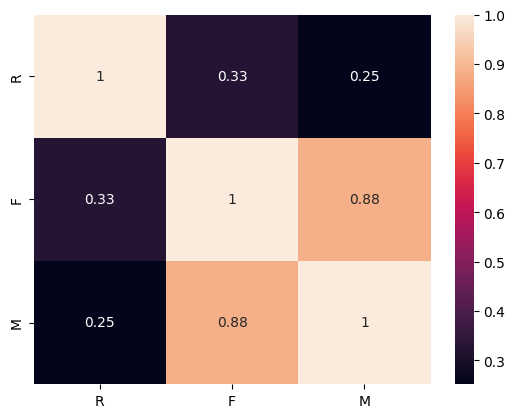

In [62]:
sns.heatmap(dfRFM.corr().abs(), annot=True)

In [67]:
dfRFM['A'] = dfRFM['M'] / dfRFM['F']

In [68]:
dfRFM

,R,F,M,A
CID,,,,
224356,37,13,1309600.0,100738.461538
276154,1,8,960400.0,120050.000000
279696,14,27,3872400.0,143422.222222
1301753,5,128,47076800.0,367787.500000
1393653,7,81,9864800.0,121787.654321
...,...,...,...,...
45151176,27,3,137200.0,45733.333333
45151177,23,3,61600.0,20533.333333
45333469,2,97,23477600.0,242037.113402


In [69]:
dfRFM.corr()

,R,F,M,A
R,1.000000,-0.326563,-0.251831,0.016896
F,-0.326563,1.000000,0.883375,0.176961
M,-0.251831,0.883375,1.000000,0.307432
A,0.016896,0.176961,0.307432,1.000000


In [70]:
dfRFM=dfRFM.drop('M', axis = 1)
dfRFM

,R,F,A
CID,,,
224356,37,13,100738.461538
276154,1,8,120050.000000
279696,14,27,143422.222222
1301753,5,128,367787.500000
1393653,7,81,121787.654321
...,...,...,...
45151176,27,3,45733.333333
45151177,23,3,20533.333333
45333469,2,97,242037.113402


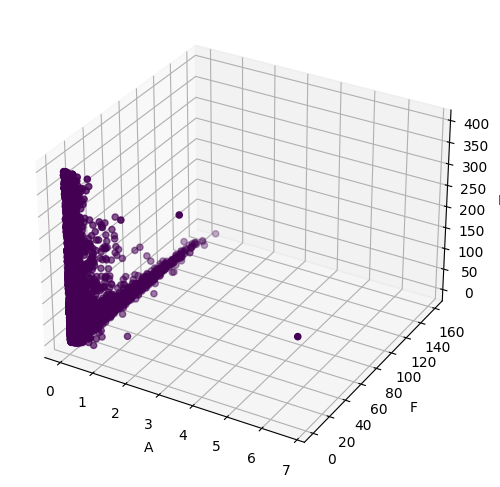

In [71]:
plot_3D(dfRFM, [0 for i in range(len(dfRFM))], 'A', 'F', 'R')

In [72]:
dfRFM.shape

(8961, 3)

In [82]:
from sklearn.ensemble import IsolationForest
labels = IsolationForest(contamination=0.005).fit_predict(dfRFM)

In [83]:
dfRFM['Status'] = labels

In [84]:
dfRFM['Status'].value_counts()

Status
 1    8920
-1      41
Name: count, dtype: int64

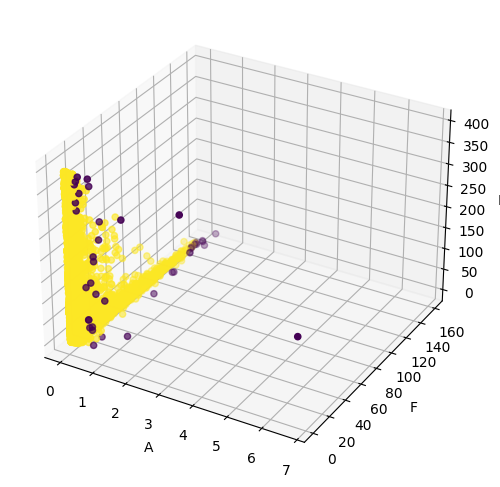

In [85]:
plot_3D(dfRFM,dfRFM['Status'] , 'A', 'F', 'R')

In [86]:
dfRFM2 = dfRFM[dfRFM.Status == 1]

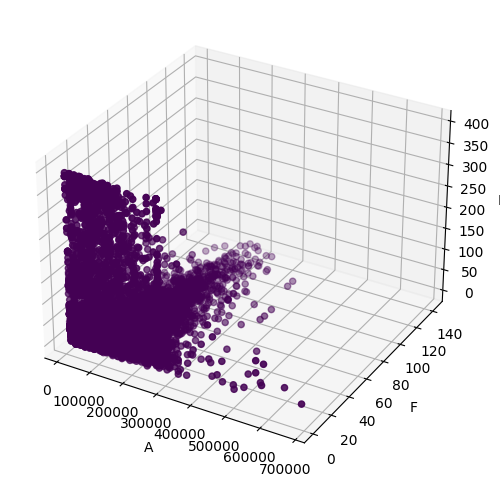

In [87]:
plot_3D(dfRFM2,dfRFM2['Status'] , 'A', 'F', 'R')

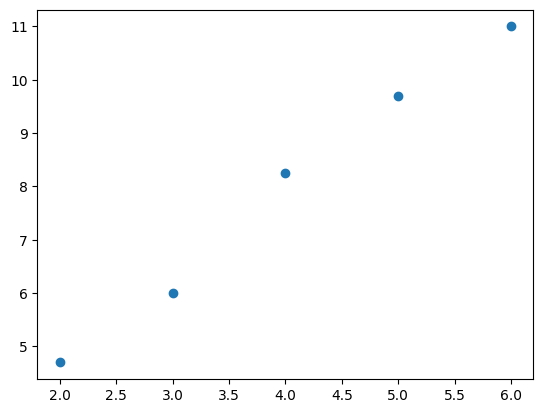

In [91]:
x = np.array([2, 3, 4, 5, 6])
y = np.array([4.7, 6, 8.25, 9.7, 11])
plt.scatter(x, y)

In [93]:
(x[0] - x.mean())*(y[0] - y.mean())

6.459999999999999

In [95]:
(x[1] - x.mean())*(y[1] - y.mean())

1.9299999999999997

In [94]:
(x - x.mean())*(y - y.mean())

array([6.46, 1.93, 0.  , 1.77, 6.14])

In [102]:
cov = np.sum((x - x.mean())*(y - y.mean()))
x.var()

2.0

In [104]:
var = np.sum((x - x.mean())**2)
var

10.0

In [105]:
m = cov / var
b = y.mean() - m * x.mean()

In [107]:
m, b

(1.6299999999999997, 1.410000000000001)

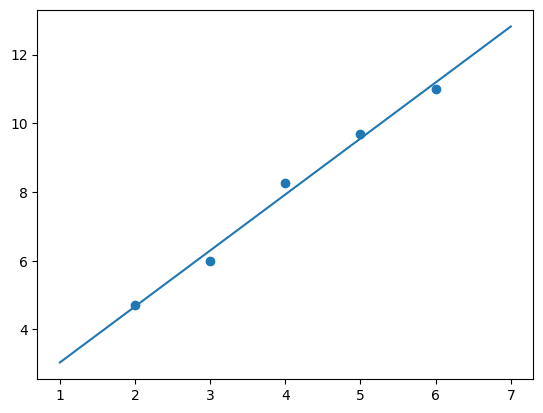

In [110]:
x = np.array([2, 3, 4, 5, 6])
y = np.array([4.7, 6, 8.25, 9.7, 11])
plt.scatter(x, y)
xs = list(range(1, 8))
ys = [m * i + b for i in xs]
plt.plot(xs, ys)
plt.show()

In [111]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [112]:
reg.fit(x, y)

ValueError: Expected 2D array, got 1D array instead:
array=[2 3 4 5 6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [113]:
c = np.array([[1, 2, 3], [8, -2, 2]])
c.shape

(2, 3)

In [114]:
c.reshape(3, 2)

array([[ 1,  2],
       [ 3,  8],
       [-2,  2]])

In [115]:
c.reshape(-1, 2)

array([[ 1,  2],
       [ 3,  8],
       [-2,  2]])

In [116]:
c.reshape(1, -1)

array([[ 1,  2,  3,  8, -2,  2]])

In [118]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x.reshape(1, -1), y.reshape(1, -1))

LinearRegression()

In [119]:
reg.coef_

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [120]:
reg.intercept_

array([ 4.7 ,  6.  ,  8.25,  9.7 , 11.  ])

In [125]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x.reshape(-1, 1), y.reshape(-1, 1))

LinearRegression()

In [126]:
reg.coef_

array([[1.63]])

In [127]:
reg.intercept_

array([1.41])

In [128]:
1.1+1.2==2.3

True

In [129]:
0.1+0.2==0.3

False

In [130]:
0.1+0.2

0.30000000000000004

In [131]:
round(0.1+0.2, 6)==0.3

True